<a href="https://colab.research.google.com/github/muniappabalaji/TimeSeries/blob/main/TimeSeries_GreatLearning_July2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [9]:
df = pd.read_csv('Dataset- Superstore (2015-2018).csv')

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
sales_data = df[['Order Date', 'Sales']]

In [13]:
sales_data = pd.DataFrame(sales_data)

In [14]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB


In [16]:
df1 = sales_data.set_index('Order Date')

In [17]:
monthly_sales = df1.resample('ME').mean()

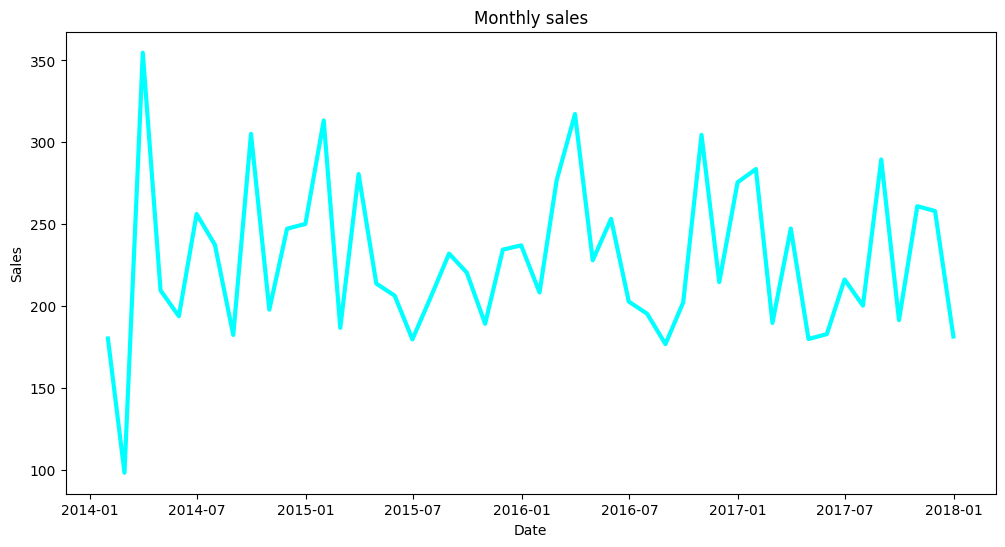

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Sales'], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [19]:
decomposition = seasonal_decompose(monthly_sales['Sales'], model='additive')

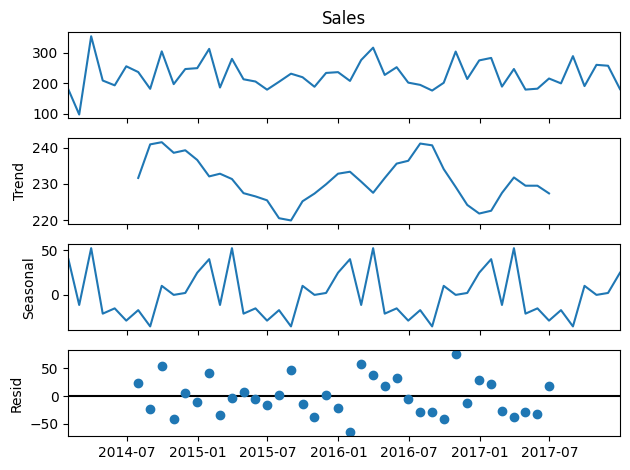

In [20]:
fig = decomposition.plot()
plt.show()

In [21]:
#Null Hypothesis: Data is not stationary
#Alternate Hypothesis: Data is stationary
#need very low p value to accept the alternate hypothesis and reject the null

In [22]:
np.random.seed(0)
random_data = np.random.randn(1000).cumsum()
adf_test = adfuller(random_data)

In [23]:
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -0.5437433594783736
p-value: 0.8831939389121154


In [24]:
def check_stationarity(timeseries):
  result = adfuller(timeseries)
  p_value = result[1]
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Stationary' if p_value < 0.05 else 'Non-Stationary')

In [25]:
check_stationarity(monthly_sales['Sales'])

ADF Statistic: -3.286567
p-value: 0.015490
Stationary


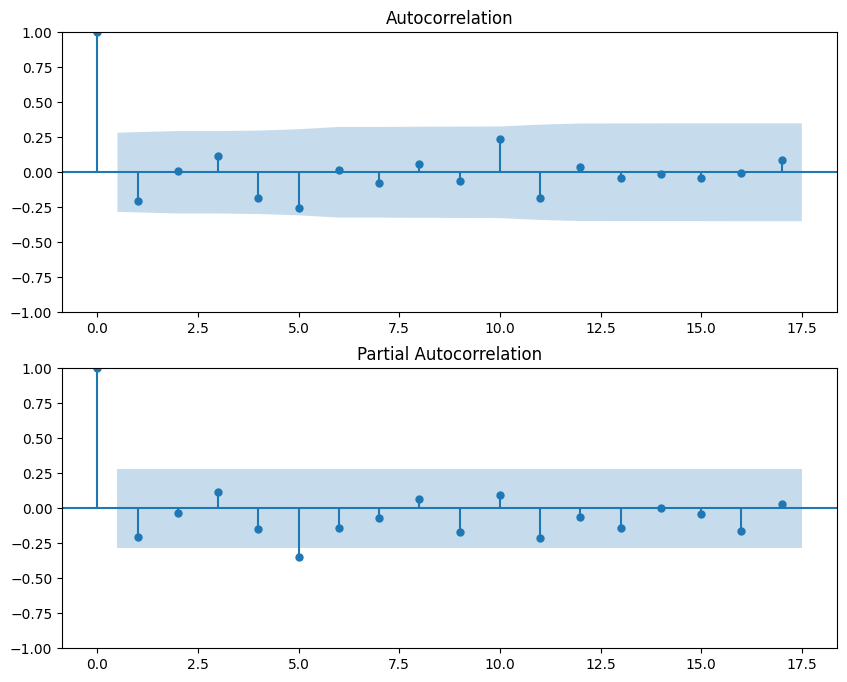

In [26]:
# Plot ACF and PACF to help determine ARIMA parameters
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(monthly_sales['Sales'], ax=axes[0])
plot_pacf(monthly_sales['Sales'], ax=axes[1])
plt.show()

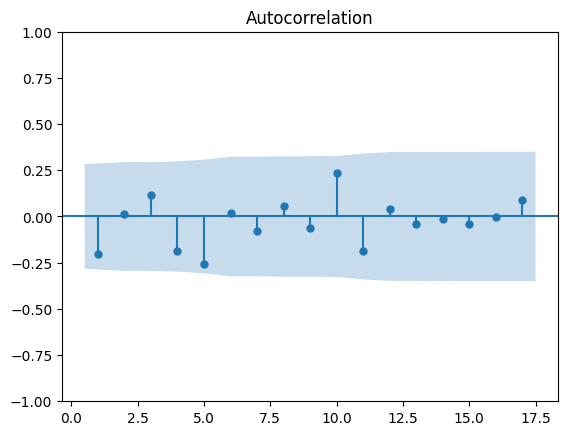

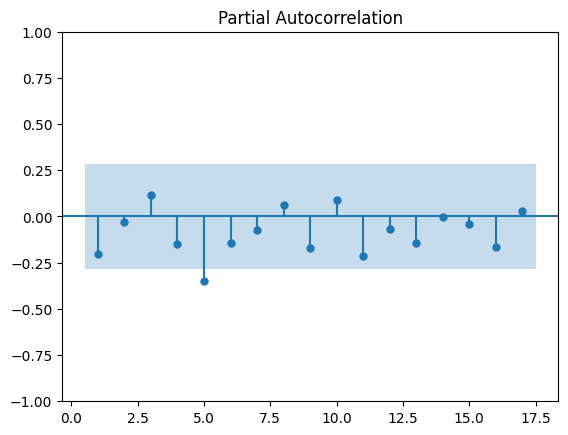

In [28]:
# Plot ACF and PACF
plot_acf(monthly_sales, zero = False)
plot_pacf(monthly_sales, zero = False)
plt.show()

# ARIMA

Divide train (3 years of 36 months) and test (1 year or 12 months)

In [30]:
# Split data into training and testing sets
train_data = monthly_sales[:-12]
test_data = monthly_sales[-12:]
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (36, 1)
Testing data shape: (12, 1)


Fit ARIMA model

AUTO ARIMA link
https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [31]:
model = ARIMA(train_data['Sales'], order=(1, 1, 1))
arima_model = model.fit()

In [32]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -188.049
Date:                Sat, 26 Jul 2025   AIC                            382.097
Time:                        11:47:39   BIC                            386.763
Sample:                    01-31-2014   HQIC                           383.708
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1903      0.230     -0.826      0.409      -0.642       0.261
ma.L1         -0.9993     19.074     -0.052      0.958     -38.383      36.384
sigma2      2427.8365   4.61e+04      0.053      0.9

Evaluate the model

In [35]:
predictions = arima_model.predict(start= len(train_data), end=len(monthly_sales)-1)

In [36]:
print(predictions)

2017-01-31    220.929614
2017-02-28    231.326974
2017-03-31    229.348326
2017-04-30    229.724869
2017-05-31    229.653212
2017-06-30    229.666848
2017-07-31    229.664253
2017-08-31    229.664747
2017-09-30    229.664653
2017-10-31    229.664671
2017-11-30    229.664667
2017-12-31    229.664668
Freq: ME, Name: predicted_mean, dtype: float64


In [37]:
# Evaluate the model using MSE and RMSE
mse = mean_squared_error(test_data['Sales'], predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 1738.6766852208118
RMSE: 41.69744219038875


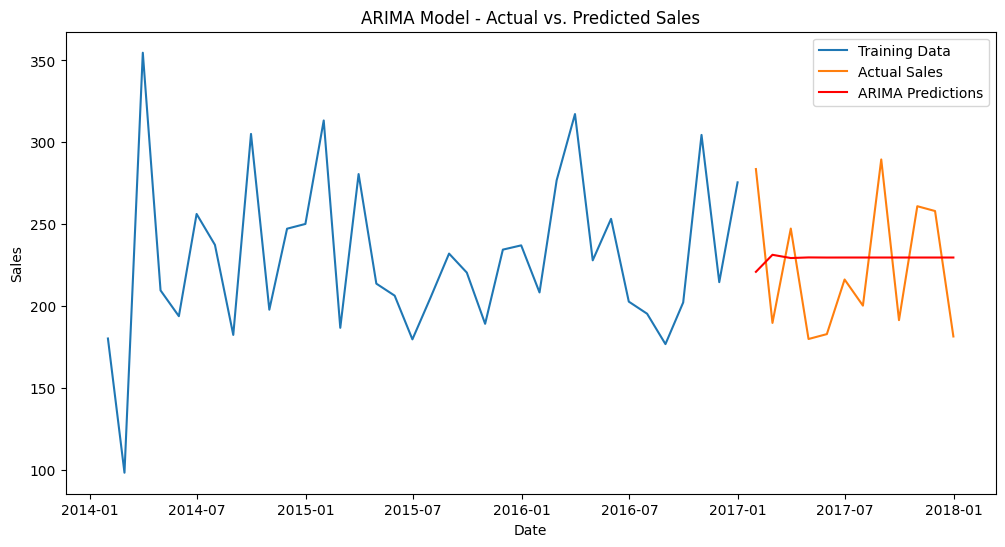

In [39]:
# Plot actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data['Sales'], label='Training Data')
plt.plot(test_data['Sales'], label='Actual Sales')
plt.plot(predictions, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model - Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

SARIMA model

In [42]:
# Fit SARIMA model
# Based on ACF and PACF plots, let's try a seasonal order of (1, 1, 1, 12)
model = SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit()
# Print the summary of the fitted model
print(sarima_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -128.893
Date:                            Sat, 26 Jul 2025   AIC                            267.785
Time:                                    12:06:43   BIC                            273.463
Sample:                                01-31-2014   HQIC                           269.213
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0672      0.394     -0.170      0.865      -0.840       0.706
ma.L1         -0.9998    176.756   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
# Fit SARIMA model
# Based on ACF and PACF plots, let's try a seasonal order of (1, 0, 0, 12)
sarima_model = SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
sarima_model_fit = sarima_model.fit(disp=False)

print(sarima_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -187.835
Date:                             Sat, 26 Jul 2025   AIC                            383.669
Time:                                     12:06:03   BIC                            389.891
Sample:                                 01-31-2014   HQIC                           385.817
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1661      0.241     -0.690      0.490      -0.638       0.306
ma.L1         -0.9998     7

In [43]:
# Make predictions on the test data
sarima_predictions = sarima_model.predict(start=len(train_data), end=len(monthly_sales)-1)
# Print the predictions
print(sarima_predictions)

2017-01-31    221.228289
2017-02-28    237.720195
2017-03-31    329.387717
2017-04-30    231.114745
2017-05-31    243.983043
2017-06-30    219.980757
2017-07-31    213.939966
2017-08-31    192.946762
2017-09-30    234.543586
2017-10-31    277.484957
2017-11-30    232.309403
2017-12-31    275.286601
Freq: ME, Name: predicted_mean, dtype: float64


In [44]:
# Evaluate the SARIMA model using MSE and RMSE
sarima_mse = mean_squared_error(test_data['Sales'], sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
print(f'SARIMA MSE: {sarima_mse}')
print(f'SARIMA RMSE: {sarima_rmse}')

SARIMA MSE: 3368.0272866617033
SARIMA RMSE: 58.034707603827066


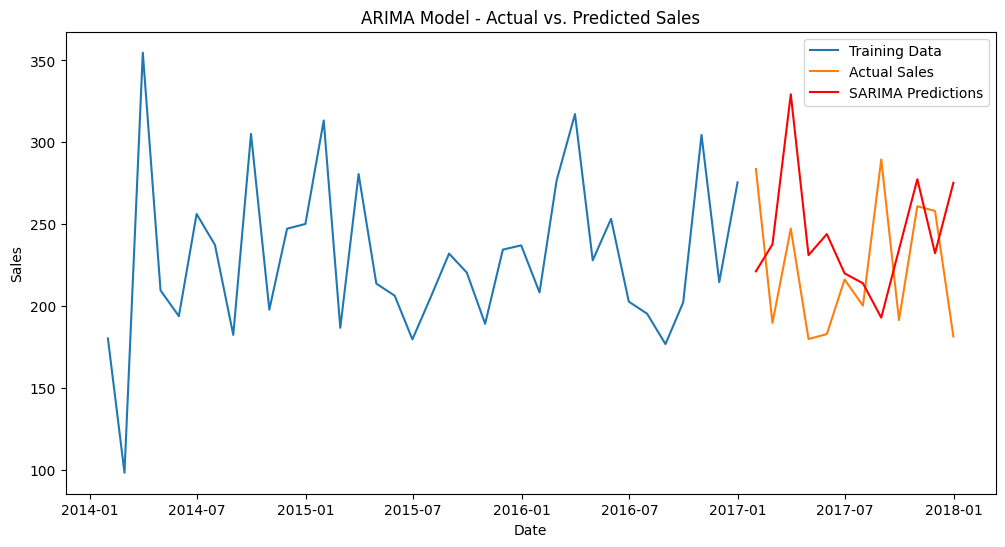

In [45]:
# Plot actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data['Sales'], label='Training Data')
plt.plot(test_data['Sales'], label='Actual Sales')
plt.plot(sarima_predictions, label='SARIMA Predictions', color='red')
plt.title('ARIMA Model - Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Prophet Model

In [46]:
!pip install prophet

In [48]:
# Create a new DataFrame for Prophet
prophet_data = monthly_sales.reset_index()
# Rename columns to 'ds'(date time) and 'y'
prophet_data = prophet_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
# Ensure 'ds' column is of datetime type (it already is from previous steps, but good practice to confirm)
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])
# Display the first few rows to verify
print(prophet_data.head())

          ds           y
0 2014-01-31  180.213861
1 2014-02-28   98.258522
2 2014-03-31  354.719803
3 2014-04-30  209.595148
4 2014-05-31  193.838418


In [49]:
from prophet import Prophet
# Instantiate a Prophet model
# We can add seasonality modes if necessary later
model = Prophet()
# Fit the model to the prophet_data DataFrame
model.fit(prophet_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbsl5boav/e5qgi6bp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbsl5boav/9tvqouhl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21549', 'data', 'file=/tmp/tmpbsl5boav/e5qgi6bp.json', 'init=/tmp/tmpbsl5boav/9tvqouhl.json', 'output', 'file=/tmp/tmpbsl5boav/prophet_modeled_v2qyh/prophet_model-20250726122002.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:20:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:20:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [50]:
# Create a future dataframe for the next 12 months (monthly frequency)
future = model.make_future_dataframe(periods=12, freq='M')
# Generate predictions using the fitted model
prophet_predictions = model.predict(future)
# Display the predictions
display(prophet_predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
55,2018-08-31,223.113250,178.315875,269.171316
56,2018-09-30,239.614763,195.516231,284.654303
57,2018-10-31,220.905390,175.308886,264.707707
58,2018-11-30,246.124332,199.752123,292.653544
59,2018-12-31,240.963200,198.114408,286.175264


In [51]:
# Align predictions with test data
# Filter prophet_predictions to include only the dates in the test_data index
prophet_test_predictions = prophet_predictions[prophet_predictions['ds'].isin(test_data.index)]
# Ensure the predictions are aligned with the test data index for calculation
# This step might not be strictly necessary if filtering is done correctly, but good for robustness
prophet_test_predictions = prophet_test_predictions.set_index('ds').loc[test_data.index]
# Calculate MSE and RMSE
prophet_mse = mean_squared_error(test_data['Sales'], prophet_test_predictions['yhat'])
prophet_rmse = np.sqrt(prophet_mse)
# Print the results
print(f'Prophet MSE: {prophet_mse}')
print(f'Prophet RMSE: {prophet_rmse}')

Prophet MSE: 1297.695744673292
Prophet RMSE: 36.02354431026036


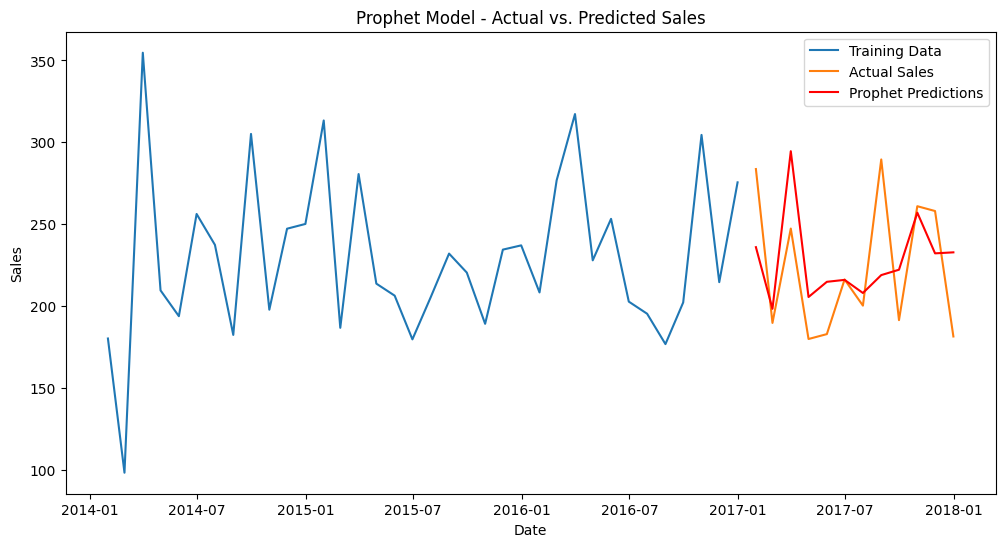

In [52]:
# Plot actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data['Sales'], label='Training Data')
plt.plot(test_data['Sales'], label='Actual Sales')
plt.plot(prophet_test_predictions['yhat'], label='Prophet Predictions', color='red')
plt.title('Prophet Model - Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()